In [1]:
%matplotlib notebook
import sympy as sp
import numpy as np
sp.init_printing()
import matplotlib.pyplot as plt
import ipywidgets as ipw

## Problem
This sheet is regarded as a numerical example of evaluating Energy dissipated in FPZ. The trilinear stress opening relation is given as:
\begin{gather*}
\sigma = f_\mathrm{t} - (f_\mathrm{t} - \sigma_s(w_1)) \frac{w}{w_1} ; \: \mathrm{for}\; 0 \leq w \leq w_1
\end{gather*}
\begin{gather*}
\sigma = \sigma_s \frac{w_2 - w}{w_2 - w_1} ; \: \mathrm{for}\; w_1 \leq w \leq w_2
\end{gather*}

<img src="stressopeningrelation.png" width="500"/> 

However, the parameters used in the bilinear softening curve can be evaluated by using formula by Xu. Hence,
\begin{gather*}
\sigma_s (CTOD_c) = \frac{f_t(2 - f_t \frac{CTOD_c}{G_f})}{\alpha_f} \\
w_1 = CTOD_c \\
w_2 = \alpha_f \frac{G_f}{f_t} \\
\alpha_f = \lambda - \frac{d_{max}}{8} \\
\end{gather*}
where, $f_t$ represents tensile strength that can be obtained by either splitting tests or by the formula $f_t = 0.4983 \sqrt f_c$ . Here, $G_f$, $\lambda$, $\alpha_f$ represents Fracture Energy, calibration factor, deformation coefficient of concrete respectively. Furthermore, $d_{max}$ depicts maximum size of coarse aggregate and $CTOD_c$ is the critical crack tip opening displacement which can be determined by replacing $x = a_0$ in the equation for $w_x$.

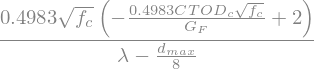

In [2]:
lamda = sp.Symbol(r'\lambda', nonnegative = True)
G_F = sp.Symbol('G_F', nonnegative = True)
d_max = sp.Symbol('d_{max}', nonnegative = True)
CTOD_c = sp.Symbol('CTOD_{c}', nonnegative = True)
CMOD_c = sp.Symbol('CMOD_{c}', nonnegative = True)
f_c = sp.Symbol('f_{c}', nonnegative = True)
w_1 = CTOD_c
f_t = 0.4983 * sp.sqrt(f_c)
alpha_f = lamda - d_max/8
w_2 = alpha_f * (G_F / f_t)
sigma_s = (f_t * (2 - f_t * (CTOD_c / G_F))) / alpha_f
sigma_s

### Calculating Stress for the trilinear stress opening curve


In [3]:
E = sp.Symbol(r'E', nonnegative = True)
w = sp.Symbol('w', nonnegative = True)
x = sp.Symbol('x', nonnegative = True)
w_0 = sp.Symbol('w_0', nonnegative = True)
a_c  = sp.Symbol('a_c', nonnegative = True)
a_0  = sp.Symbol('a_0', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
P_max = sp.Symbol('P_{max}', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)

### Critical Effective length
- Calculation of Critical Effective Length using:
\begin{gather*}
a_i = \frac{2}{\pi}(D + H_0) \arctan{\sqrt{\frac{B E C_{si}}{32.6} - 0.1135}} - H_0
\end{gather*}
where, $C_{si}$ is the secant compliance at any crack propagation. The critical effective crack length $a_c$ can be derived by setting:
\begin{gather*}
C_{si}= \frac{CMOD_c}{P_{max}}
\end{gather*}

In [4]:
C_si = sp.Symbol('C_{si}', nonnegative = True)
CMOD_c = sp.Symbol('CMOD_c', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
lamda = sp.Symbol(r'\lambda', nonnegative = True)
d_max = sp.Symbol('d_{max}', nonnegative = True)
C_si = CMOD_c / P_max

In [5]:
params = {P_max : 9.72, 
          D : 500, 
          H_0 : 10, 
          B : 196, 
          E : 1000, 
          a_0 : 46, 
          CMOD_c : 0.1366, 
          f_c : 45000, 
          lamda : 2, 
          d_max : 10,
          G_F : 100,
          CTOD_c : 0.03,
          pi : 3.14
         }

In [6]:
C_si_ = C_si.subs(params)
C_si_

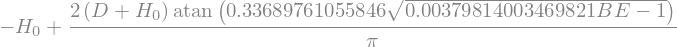

In [7]:
a_i = (2/pi) * (D + H_0) * sp.atan(sp.sqrt((B*E*C_si_)/(32.6)-0.1135)) - H_0
a_i

In [8]:
a_c = a_i.subs(params)
a_c

\begin{gather*}
w_x = CMOD_c\left[\left(1 - \frac{x}{a_c}\right)^2 + \left(1.081 - 1.149 \left(\frac{a_c}{D}\right)\right)\left[\frac{x}{a_c} - \left(\frac{a_0}{a_c}\right)^2\right]\right]^{1/2} 
\end{gather*}


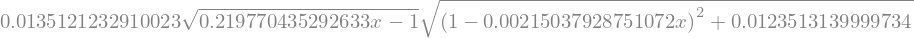

In [9]:
w_x = CMOD_c * sp.sqrt(((1 - x/a_c)**2 + (1.081 - 1.149*(a_c/D)))*(x/a_c - (a_0/a_c)**2))
wx_ = w_x.subs(params)
wx_

In [10]:
get_w_x = sp.lambdify((x), wx_, 'numpy')
get_w_x

<function _lambdifygenerated(x)>

<IPython.core.display.Javascript object>


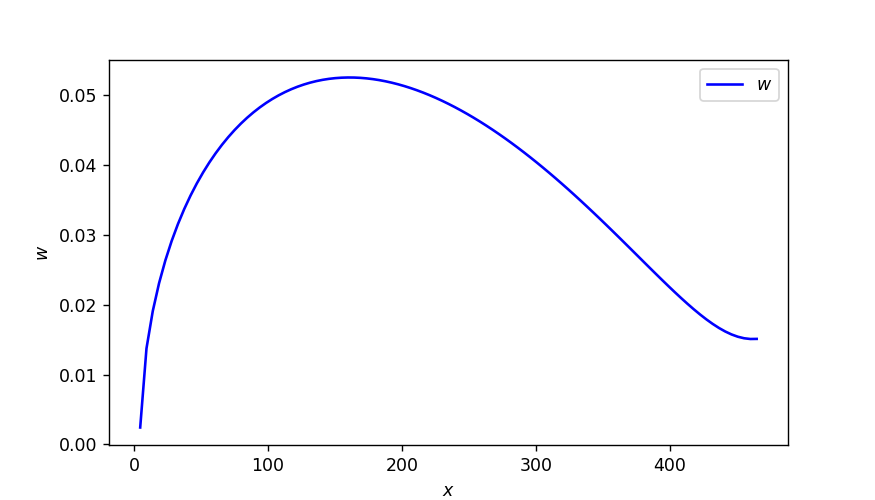

<string>:2: RuntimeWarning: invalid value encountered in sqrt


In [26]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0, 465, 100)
w_x_rec = get_w_x(x_range) 
ax1.plot(x_range, w_x_rec, color='b', label = '$w$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$w$')
ax1.legend()

In [12]:
#w_x_rec

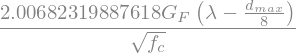

In [13]:
w_2

In [14]:
w_2.subs(params)

In [15]:
w_1

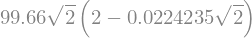

In [16]:
sigma_s.subs(params)

In [17]:
f_t.subs(params)

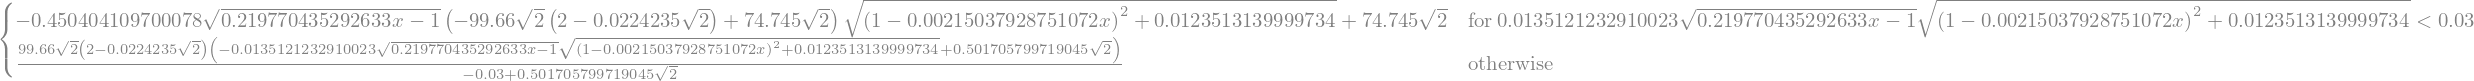

In [18]:
sigma_1 = f_t - (f_t - sigma_s) * (wx_ / w_1) 
sigma_2 = sigma_s * (w_2 - wx_) / (w_2 - w_1)
sigma = sp.Piecewise(
    (sigma_1.subs(params), wx_.subs(params)< w_1.subs(params)),
    (sigma_2.subs(params), True)
)
sigma

In [19]:
get_sigma = sp.lambdify((x), sigma, 'numpy')
get_sigma

<function _lambdifygenerated(x)>

<img src="cracktipzoom.png" width="600"/> 

<IPython.core.display.Javascript object>


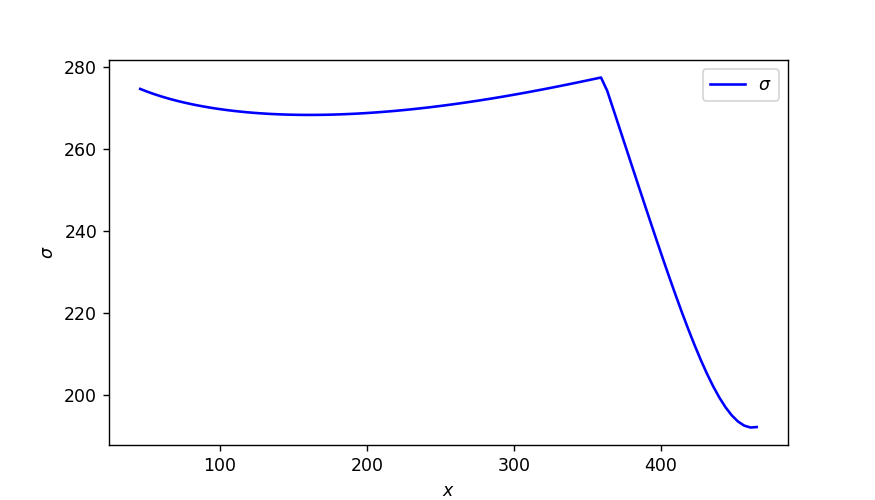

In [27]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(46, 465, 100)
sigma_rec = get_sigma(x_range) 
ax1.plot(x_range, sigma_rec, color='b', label = '$\sigma$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$\sigma$')
ax1.legend()

### Determining Cohesive Breaking Energy
$G_{I-cohesive}$ is defined as the average energy dissipation per unit length due to bridging cohesive action:
\begin{gather*}
G_{I-cohesive} = \frac{1}{a - a_0} \int_{a_0}^{a} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 
especially when crack length $a$ reaches critical effective crack propagation length $a_c$, $G_{I-cohesive}$ becomes critical cohesive crack breaking energy $G^c_{Ic}$ and is given as:
\begin{gather*}
G_{Ic} = \frac{1}{a_c - a_0} \int_{a_0}^{a_c} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 

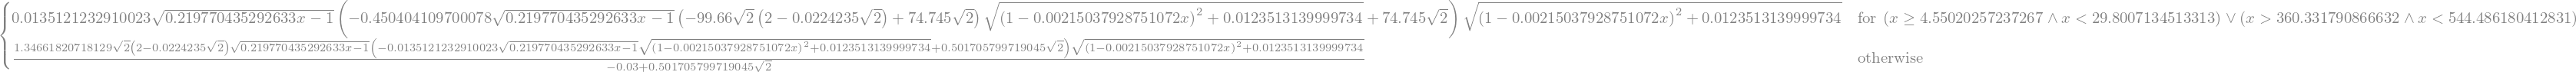

In [21]:
#from sympy.holonomic import expr_to_holonomic
#g = expr_to_holonomic(sigma(x)).integrate(x).to_expr()
g = sp.integrate(sigma, (w, 0, wx_))
g

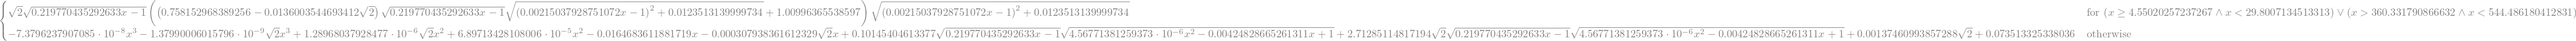

In [22]:
g_ = sp.simplify(g)
g_

In [23]:
get_g = sp.lambdify((x), g, 'numpy')
get_g

<function _lambdifygenerated(x)>

<img src="gfdistribution.png" width="600"/> 

<IPython.core.display.Javascript object>


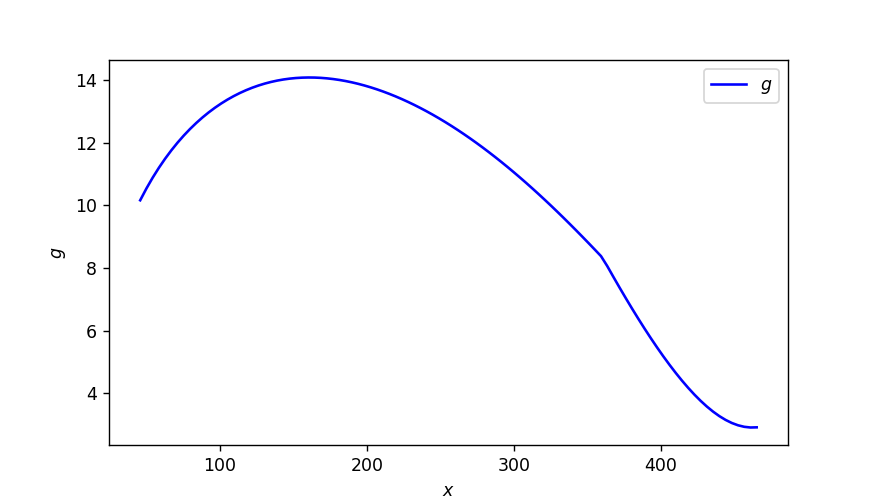

In [24]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(46, 465, 100)
g_rec = get_g(x_range) 
ax1.plot(x_range, g_rec, color='b', label = '$g$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$g$')
ax1.legend()

In [31]:
G_Ic = 1/(a_c.subs(params) - a_0.subs(params)) * sp.integrate(g, (x,46,465))
G_Ic

KeyboardInterrupt: 

In [ ]:
get_G_Ic = sp.lambdify((x), G_Ic, 'numpy')
get_G_Ic 

In [ ]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.05, 0.13, 100)
G_Ic_ = get_G_Ic(x_range) 
ax1.plot(x_range, G_Ic_, color='b', label = '$G_{Ic}$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$G_{Ic}$')
ax1.legend()

### Unstable Fracture Energy
The unstable fracture energy can be obtained as:
\begin{gather*}
G^{un}_{Ic} = \frac{3 P^2_{max}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
\begin{gather*}
V(\alpha) = \left( \frac{\alpha}{1 - \alpha} \right)^2 [5.58 - 19.57 \alpha + 36.82 \alpha^2 - 34.94 \alpha^3 + 12.77 \alpha^4]
\end{gather*}
\begin{gather*}
\alpha = \frac{(a + H_0)}{(D + H_0)}
\end{gather*}

In [70]:
params_un = {P_max : 9720, 
          D : 0.5, 
          H_0 : 0.01, 
          B : 0.196, 
          E : 1000, 
          a_0 : 0.046,  
         }

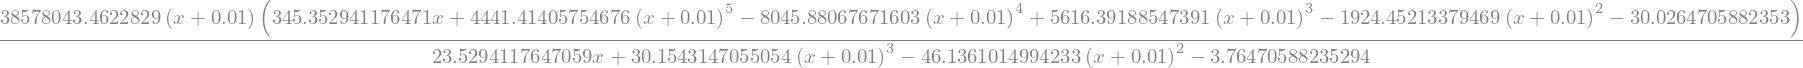

In [91]:
alpha = sp.Symbol(r'\alpha', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
V_alpha = (alpha / (1 - alpha))**2 * (5.58 - 19.57* alpha + 36.82 * alpha**2 - 34.94 * alpha**3 + 12.77 * alpha**4)
G_un = sp.simplify((3*P_max**2)/(4*B**2*D**3*E) * V_alpha.diff(alpha))
alpha_ = (a + H_0) / (D + H_0)
alpha_
G_un_f = G_un.subs(alpha,alpha_).subs(params_un).subs(a,x)
G_un_f

In [83]:
alpha_.subs(params).subs(a, a_c)

In [72]:
get_G_un = sp.lambdify((x), G_un_f, 'numpy')
get_G_un

<function _lambdifygenerated(x)>

In [88]:
V = sp.simplify(V_alpha.diff(alpha))
V.subs(alpha, alpha_.subs(params).subs(a, a_c))

<IPython.core.display.Javascript object>


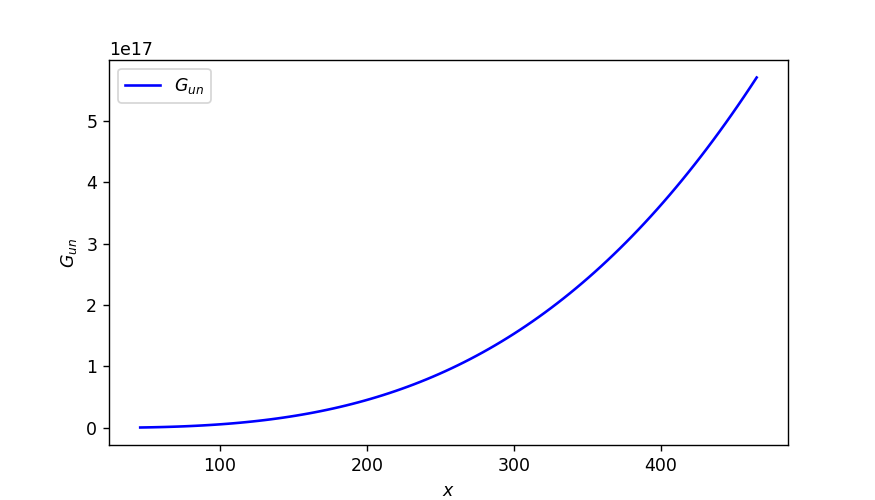

In [73]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(46, 465, 100)
G_un_ = get_G_un(x_range) 
ax1.plot(x_range, G_un_, color='b', label = '$G_{un}$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$G_{un}$')
ax1.legend()

### Initial Fracture Energy
\begin{gather*}
G^{ini}_{Ic} = \frac{3 P^2_{ini}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
or, 
\begin{gather*}
G^{ini}_{Ic} = G^{un}_{Ic}  - G^{c}_{Ic}
\end{gather*}

In [ ]:
G_ini = G_un_f - G_Ic
G_ini

In [ ]:
get_G_ini = sp.lambdify((x), G_ini, 'numpy')
get_G_ini

In [ ]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.05, 0.13, 100)
G_ini_ = get_G_ini(x_range) 
ax1.plot(x_range, G_ini_, color='b', label = '$G_{ini}$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$G_{ini}$')
ax1.legend()

In [ ]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.05, 0.13, 100)
G_ini_ = get_G_ini(x_range) 
G_un_ = get_G_un(x_range)
G_I_c_ = get_G_Ic(x_range)  
ax1.plot(x_range, G_ini_, color='b', label = '$G_{ini}$')
ax1.plot(x_range, G_un_, color='r', label = '$G_{un}$')
ax1.plot(x_range, G_I_c_, color='y', label = '$G_{Ic}$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$G$')
ax1.legend()